# 第六章-梯度下降法 `Gradient Descent`

## 6-1 什么是梯度下降法

- 不是一个机器学习算法
- 是一种基于搜索的最优方法
- 作用: 最小化一个损失函数
- 梯度上升法: 最大化一个效用函数

![](./picture/6-1-1.png)

![](./picture/6-1-2.png)

- $\eta$ 称为学习率`(learning rate)`
- $\eta$ 的取值影响获得最优解的速度
- $\eta$ 取值不合适, 甚至得不到最优解
- $\eta$ 是梯度下降法的一个超参数

![](./picture/6-1-3.png)

![](./picture/6-1-4.png)

![](./picture/6-1-5.png)

- 并不是所有函数都有唯一的极值点
<br>
解决方案:
- 多次运行, 随机化初始点
- 梯度下降法的初始点也是一个超参数

**线性回归中使用梯度下降法**  
目标: 使 $\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}$ 尽可能小  
线性回归法的损失函数具有唯一的最优解

## 6-2 梯度下降法模拟

### 6-2-1 简单实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5)**2 - 1

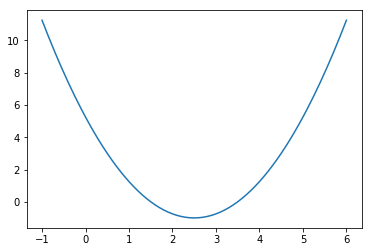

In [3]:
plt.plot(plot_x, plot_y)
plt.show()

In [4]:
def dj(theta): # 在上面的曲线中 theta 这个点对应的导数,即梯度
    return 2 * (theta - 2.5)
def J(theta):  # 当前 theta 在损失函数中的值
    try:       # 防止最终计算的损失函数值过大导致程序异常退出
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf') # 当最终计算结果非常大报错时返回无穷

In [5]:
eta = 0.1     # 设置每一次下降的步长
theta = 0.0   # 使用 0 做为初始点
epsilon = 1e-8
while True:
    gradient = dj(theta)  # 计算该点的梯度
    last_theta = theta    # 保存上一次的 theta 的值
    
    # 上一次的theta值减去步长乘以上一次theta值对应的梯度, 做为下次的theta值
    theta = theta - eta * gradient    
    
    # 当theta对应的导数为0时,为最小值, 此处判断 abs(J(theta)-J(last_theta) 是否在误差范围内
    if (abs(J(theta)-J(last_theta)) < epsilon):  
        break
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


`theta` 的变化过程

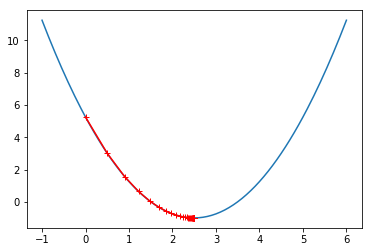

In [6]:
eta = 0.1
theta = 0.0
theta_history = [theta]
epsilon = 1e-8
while True:
    gradient = dj(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if (abs(J(theta)-J(last_theta)) < epsilon):
        break
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker="+")
plt.show()

因为梯度刚开始比较大, 因此 `theta = theta - 步长 * 梯度` 也会比较大, 随着梯度的越来越小, 越来越接近于0, 上面的 `theta` 值也会越来越小.

In [7]:
print(len(theta_history))

46


### 6-2-2 封装上述实现的梯度下降法

In [8]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    # 设置循环次数, 防止死循环(当步长过大,函数不收敛或找不到极值的情况)
    while i_iter < n_iters:  
        gradient = dj(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if (abs(J(theta)-J(last_theta)) < epsilon):
            break
        i_iter += 1
        
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker="+")
    plt.show()

424


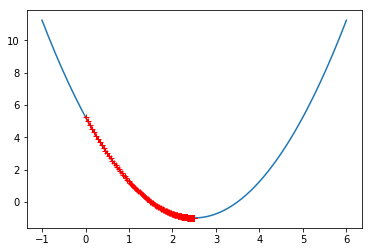

In [9]:
eta = 0.01  # 设置较小的步长(学习率变低)
theta_history = []
gradient_descent(0., eta)

print(len(theta_history))
plot_theta_history()

22


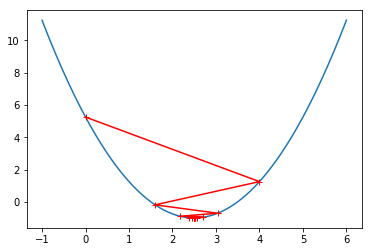

In [10]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)

print(len(theta_history))
plot_theta_history()

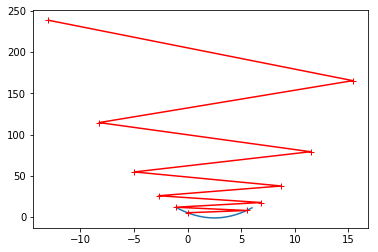

11
-12.979341056000022


In [11]:
eta = 1.1
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()
print(len(theta_history))
print(theta_history[-1])

In [12]:
type(float('inf'))

float

## 6-3 多元线性回归中的梯度下降法

![](./picture/6-3-2.png)

![](./picture/6-3-3.png)

![](./picture/6-3-4.png)

![](./picture/6-3-5.png)

![](./picture/6-3-1.jpg)

## 6-4 实现线性回归中的梯度下降法

(100,) (100,)


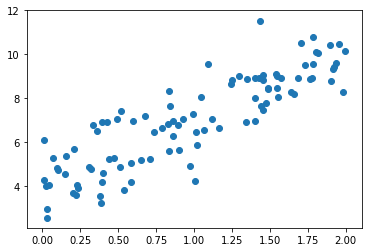

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
print(x.shape, y.shape)
plt.scatter(x, y)
plt.show()

X = x.reshape(-1, 1)

In [14]:
def J(theta, X_b, y):  # 计算损失函数的值
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float("inf")

In [15]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = np.sum((X_b.dot(theta) - y).dot(X_b[:, i]))
    return res * 2 / len(X_b)

In [16]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if (abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [17]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

print(theta)

[4.02145786 3.00706277]


**封装上述代码**

In [4]:
class LinearRegression:
    def __init__(self):
        """初始化Linear Regression 模型"""
        self.coef_ = None  # 系数
        self.interception_ = None   # 截距
        self._theta = None
        
    def fit_normal(self, X_train, y_train):
        """X_train 是一个矩阵, x_train 与 y_train 是一个向量"""
        assert X_train.shape[0] == y_train.shape[0], "X_train 中的样本数量和 y_train 中的标记数量应该相等!"
        
        # np.hstack 在横向上多加一列
        # np.ones((len(X_train), 1)) 创建一个行数与X_train相同, 列全部为1的矩阵
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        
        # np.linalg.inv()  求逆矩阵
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], "x_train size must be equal size of y_train"
        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
            except:
                return float("inf")
        def dJ(theta, X_b, y):
#             res = np.empty(len(theta))
#             res[0] = np.sum(X_b.dot(theta) - y)
#             for i in range(1, len(theta)):
#                 res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
#             return res * 2 / len(X_b)
            # 向量化
            return X_b.T.dot(X_b.dot(theta) - y) * 2.0 /len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            i_iter = 0

            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient

                if (abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
                    break
                i_iter += 1
            return theta
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        eta = 0.01

        self._theta = gradient_descent(X_b, y_train, initial_theta, eta)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    def predict(self, X_predict):
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must be equal to X_train!"
        
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
    
    def __repr__(self):
        return "LinearRegression()"

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

X = x.reshape(-1, 1)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [7]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[3.00706277]
4.021457858204859


## 6-5 梯度下降的向量化和数据标准化

![](./picture/6-5-1.png)

![](./picture/6-5-2.png)

梯度下降法的优势

In [8]:
import numpy as np
m = 1000
n = 5000

big_x = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_x.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0, 10, size=m)

In [9]:
big_reg = LinearRegression()
%time big_reg.fit_normal(big_x, big_y)

CPU times: user 1min 21s, sys: 1.75 s, total: 1min 23s
Wall time: 23.4 s


LinearRegression()

In [10]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_x, big_y)

CPU times: user 11.3 s, sys: 1.53 s, total: 12.8 s
Wall time: 3.66 s


LinearRegression()

## 6-6 随机梯度下降法

### 批量梯度下降法 `Batch Gradient Descent`

![](./picture/6-6-1.png)

### 随机梯度下降法 `Stochastic Gradient Descent`

![](./picture/6-6-2.png)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

In [13]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [15]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

print(theta)

[3.05160284 4.0191146 ]
CPU times: user 271 ms, sys: 3.84 ms, total: 275 ms
Wall time: 276 ms


## 6-7 `scikit-learn` 中的随机梯度下降法

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

x = x[y < 50.0]
y = y[y < 50.0]

**将数据分成训练数据集和测试数据集**

In [27]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

**将数据进行归一化处理**

In [28]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)
x_train_standard = standarScaler.transform(X_train)
x_test_standard = standarScaler.transform(x_test)

**`scikit-learn`中的SGD**

In [29]:
from sklearn.linear_model import SGDRegressor

In [30]:
sgd_reg = SGDRegressor(n_iter=5)  # n_iter 默认为 5
%time sgd_reg.fit(x_train_standard, y_train)
sgd_reg.score(x_test_standard, y_test)

CPU times: user 0 ns, sys: 3.51 ms, total: 3.51 ms
Wall time: 11.2 ms


/home/ubuntu/Env/py3tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8054564737036273

In [31]:
sgd_reg = SGDRegressor(n_iter=100)
%time sgd_reg.fit(x_train_standard, y_train)
sgd_reg.score(x_test_standard, y_test)

CPU times: user 9.13 ms, sys: 211 µs, total: 9.34 ms
Wall time: 7.93 ms


/home/ubuntu/Env/py3tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8131700025932211

## 6-8 梯度下降法调试

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [21]:
true_theta = np.arange(1, 12, dtype=np.float).reshape(11, 1)
X_b = np.hstack([np.ones(shape=(len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=(1000))

## 6-9 梯度下降法总结

- 批量梯度下降法
- 随机梯度下降法
- 小批量梯度下降法

### 随机

- 跳出局部最优解
- 更快运行速度
- 机器学习领域很多算法都要使用随机的特点: 随机搜索, 随机森林